In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ft2font
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
#Reading Coco dataset
config_file='C:/Users/Ganesh Prasad GSP/Desktop/OPEN CV/Requirements/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='C:/Users/Ganesh Prasad GSP/Desktop/OPEN CV/Requirements/frozen_inference_graph.pb'
#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [3]:
#Reading Coco dataset
classLabels=[]
filename='C:/Users/Ganesh Prasad GSP/Desktop/OPEN CV/Requirements/yolo3.txt'
with open(filename,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')
print("Number of Classes")
print(len(classLabels))
print("Class labels")
print(classLabels)

Number of Classes
80
Class labels
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
#Model training
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001CDDE543870>

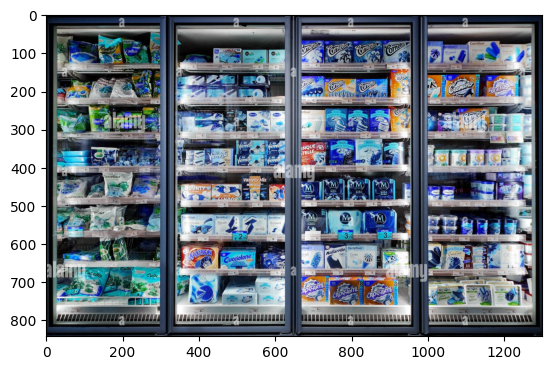

In [8]:
#reading image
img = cv2.imread('C:/Users/Ganesh Prasad GSP/Desktop/OPEN CV/images/freezer_image (1).jpg')
plt.imshow(img)

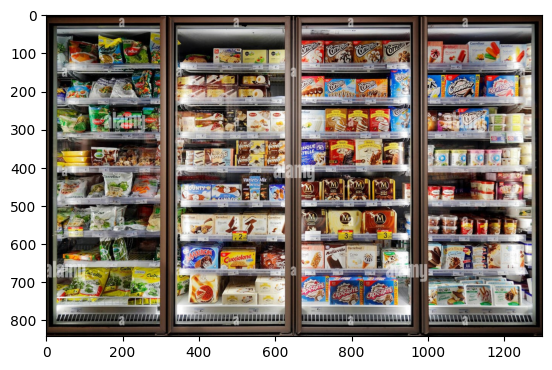

In [9]:
#converting image from BGR to RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
#object detection
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [12]:
#fetching accuracy
print(confidence)

[0.5582184]


In [13]:
#fetching object index
print(ClassIndex)

[60]


In [14]:
#fetching coordinates of boxes
print(bbox)

[[  51   64 1206  720]]


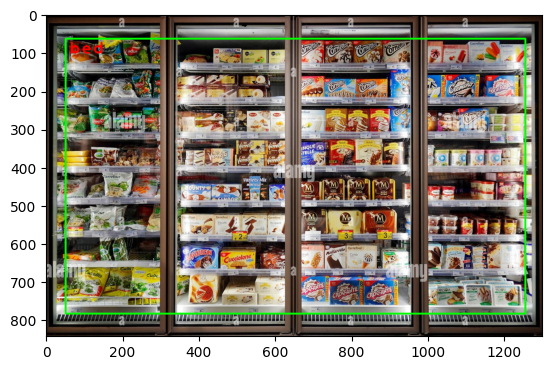

In [15]:
#plotting boxes
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 255, 0), 3)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [21]:
# Draw bounding boxes and display the image
font_scale = 1
font = cv2.FONT_HERSHEY_SIMPLEX
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 255, 0), 2)
    cv2.putText(img, 'Compartment', (boxes[0], boxes[1] - 10), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

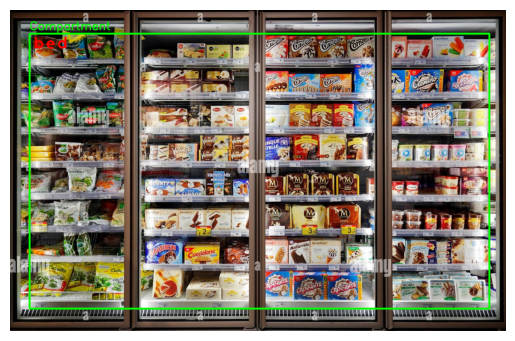

In [23]:
# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [25]:
# Count the number of compartments
num_compartments = len(bbox)

In [26]:
# Display the count of compartments
print("Number of compartments:", num_compartments)

Number of compartments: 1


: 